# Timeline Analysis : Covid-19
<img src="covid.jpg">

### Importing Important Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline
sns.set()

### Importing Dataset

In [8]:
df = pd.read_csv("owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN


In [3]:
df.shape

(119040, 64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 64 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               119040 non-null  object 
 1   continent                              113606 non-null  object 
 2   location                               119040 non-null  object 
 3   date                                   119040 non-null  object 
 4   total_cases                            113095 non-null  float64
 5   new_cases                              113092 non-null  float64
 6   new_cases_smoothed                     112077 non-null  float64
 7   total_deaths                           102371 non-null  float64
 8   new_deaths                             102526 non-null  float64
 9   new_deaths_smoothed                    112077 non-null  float64
 10  total_cases_per_million                112499 non-null  

In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
count,1.130950e+05,113092.000000,112077.000000,1.023710e+05,102526.000000,112077.000000,112499.000000,112496.000000,111486.000000,101788.000000,...,108695.000000,82360.000000,81164.000000,52971.000000,95905.000000,112925.000000,105556.000000,4132.000000,4132.000000,4207.000000
mean,1.395125e+06,6455.089838,6470.586829,3.559440e+04,145.866707,132.681572,17220.447466,82.621404,82.565930,362.357613,...,8.009587,10.597125,32.735569,50.747527,3.024492,73.259407,0.726610,27472.271031,7.944584,14.965103
std,9.357670e+06,39411.338115,38991.132280,2.121958e+05,795.166697,743.140566,29570.511077,192.851696,163.028292,618.278641,...,4.270851,10.505265,13.500596,31.753623,2.453322,7.543234,0.150234,80443.208509,16.013207,31.373302
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,...,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.400000,-27.350000,-95.920000
25%,1.908000e+03,3.000000,9.000000,6.600000e+01,0.000000,0.000000,332.539000,0.278000,1.517000,10.033000,...,5.310000,1.900000,21.600000,19.351000,1.300000,67.920000,0.602000,-287.125000,-1.680000,-1.735000
50%,1.961800e+04,91.000000,112.429000,5.860000e+02,2.000000,1.571000,2599.820000,10.455000,14.298500,66.205500,...,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,1290.900000,3.975000,5.560000
75%,2.055125e+05,914.000000,965.143000,5.002000e+03,19.000000,15.571000,20457.276000,80.337250,89.691000,435.540000,...,10.080000,19.300000,41.100000,82.502000,3.861000,78.740000,0.848000,16880.550000,12.902500,21.265000
max,2.311533e+08,906034.000000,826428.571000,4.737904e+06,17976.000000,14723.000000,215155.192000,8620.690000,3385.473000,5970.788000,...,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,647166.900000,106.830000,372.820000


### Data Exploration

In [44]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head(-5)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-02-24,5.0,5.0,NaN,NaN,NaN
2020-02-25,5.0,0.0,NaN,NaN,NaN
2020-02-26,5.0,0.0,NaN,NaN,NaN
2020-02-27,5.0,0.0,NaN,NaN,NaN
2020-02-28,5.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...
2021-09-15,127083.0,266.0,4551.0,6482.0,1200458.0
2021-09-16,127368.0,285.0,4560.0,3803.0,1204261.0
2021-09-17,127632.0,264.0,4562.0,4610.0,1208871.0


In [45]:
df1.mean()

total_cases     1.395125e+06
new_cases       6.455090e+03
total_deaths    3.559440e+04
new_tests       5.405306e+04
total_tests     1.035388e+07
dtype: float64

In [46]:
df1.corr()

,total_cases,new_cases,total_deaths,new_tests,total_tests
total_cases,1.000000,0.840478,0.987161,0.797308,0.958996
new_cases,0.840478,1.000000,0.844734,0.742710,0.600199
total_deaths,0.987161,0.844734,1.000000,0.728036,0.869106
new_tests,0.797308,0.742710,0.728036,1.000000,0.843542
total_tests,0.958996,0.600199,0.869106,0.843542,1.000000


In [47]:
df1.var()

total_cases     8.756600e+13
new_cases       1.553254e+09
total_deaths    4.502705e+10
new_tests       3.633091e+10
total_tests     1.915770e+15
dtype: float64

In [48]:
df1.std()

total_cases     9.357670e+06
new_cases       3.941134e+04
total_deaths    2.121958e+05
new_tests       1.906067e+05
total_tests     4.376951e+07
dtype: float64

### Data Visualization

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


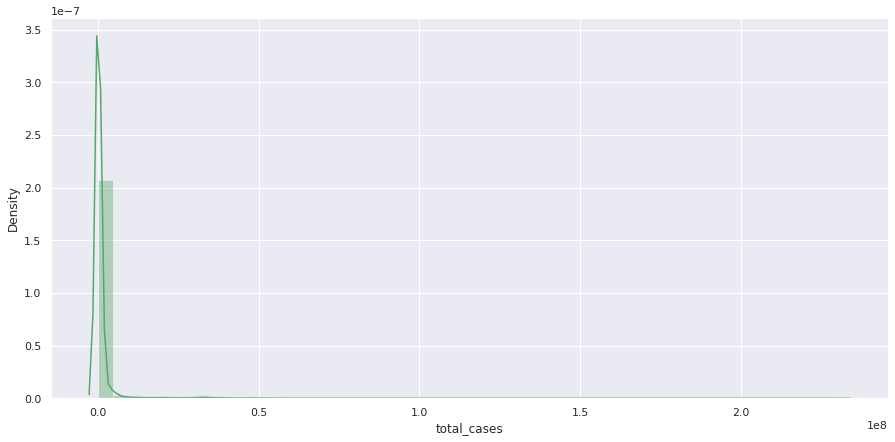

In [49]:
plt.figure(figsize=(15,7))
sns.distplot(df1['total_cases'], color='g')

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


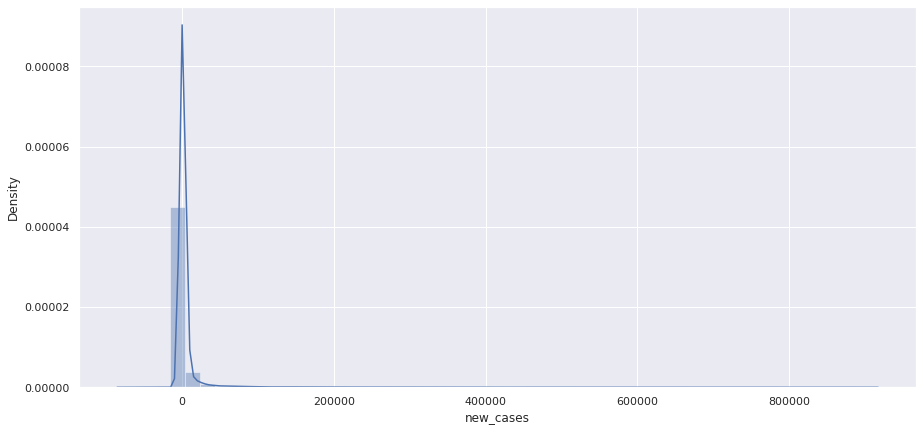

In [50]:
plt.figure(figsize=(15,7))
sns.distplot(df1['new_cases']);

Text(0.5, 0, 'Month')

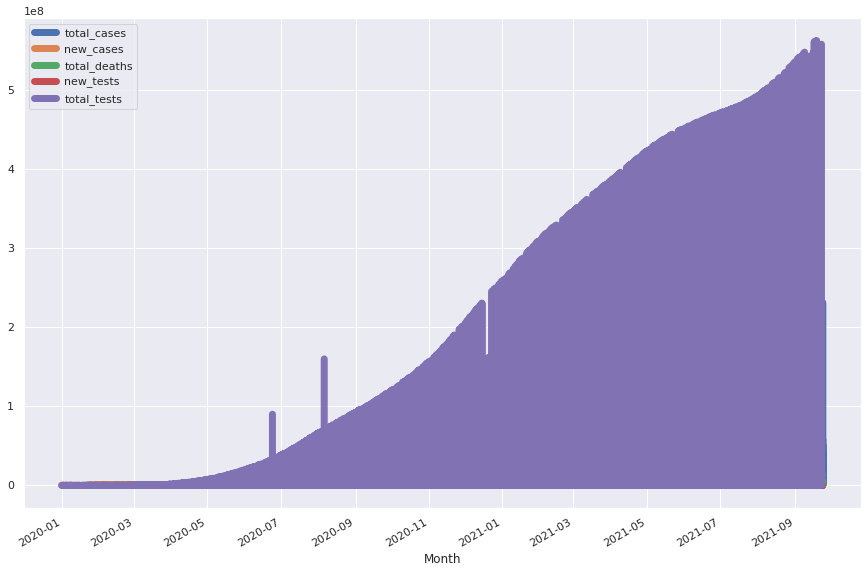

In [56]:
df1.plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month')

Text(0.5, 0, 'Month')

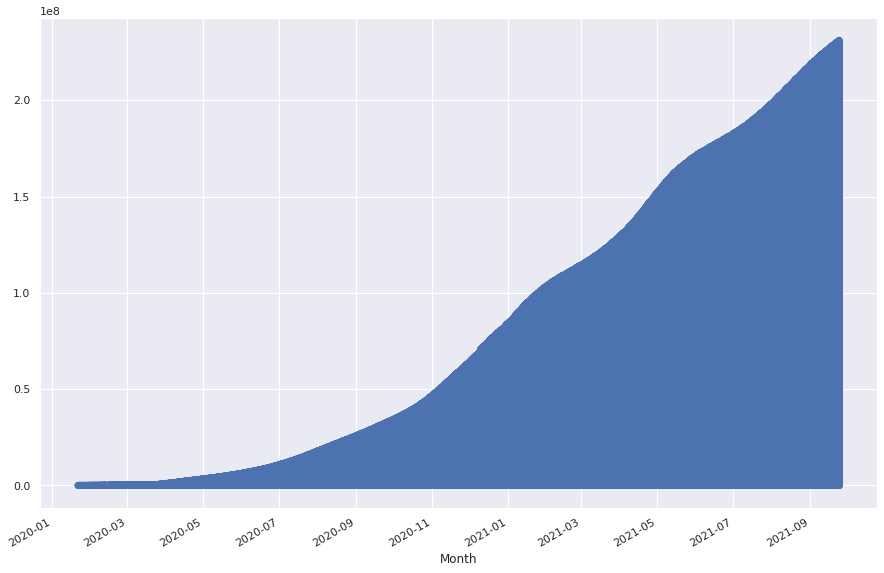

In [55]:
df1.total_cases.plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month')

Text(0.5, 0, 'Month')

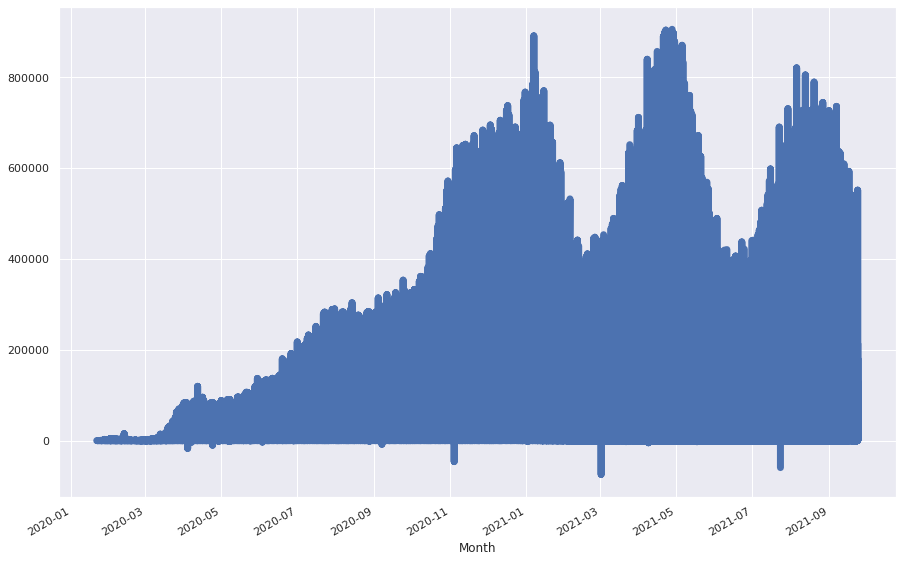

In [54]:
df1.new_cases.plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month')

Text(0.5, 0, 'Month')

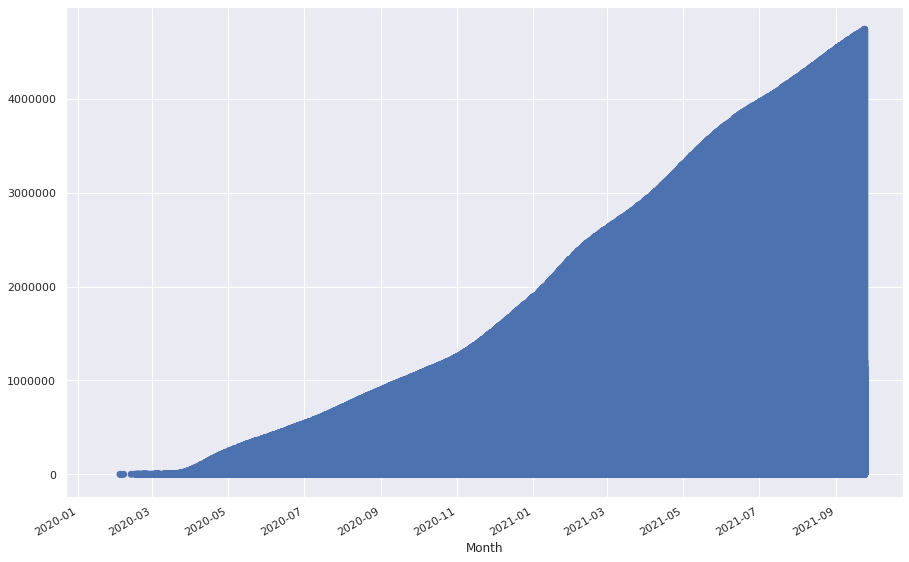

In [57]:
df1.total_deaths.plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month')

Text(0.5, 0, 'Month')

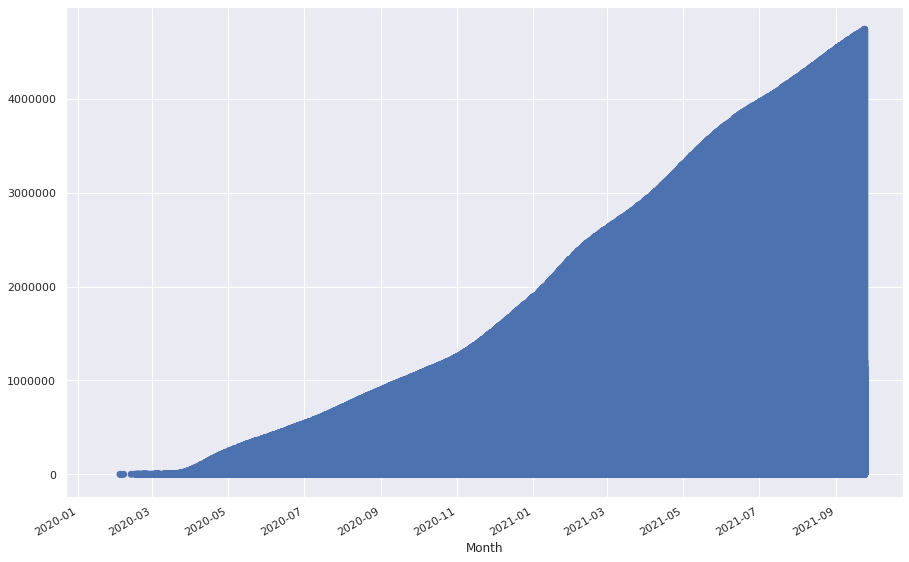

In [58]:
df1.total_deaths.plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month')

Text(0.5, 0, 'Month')

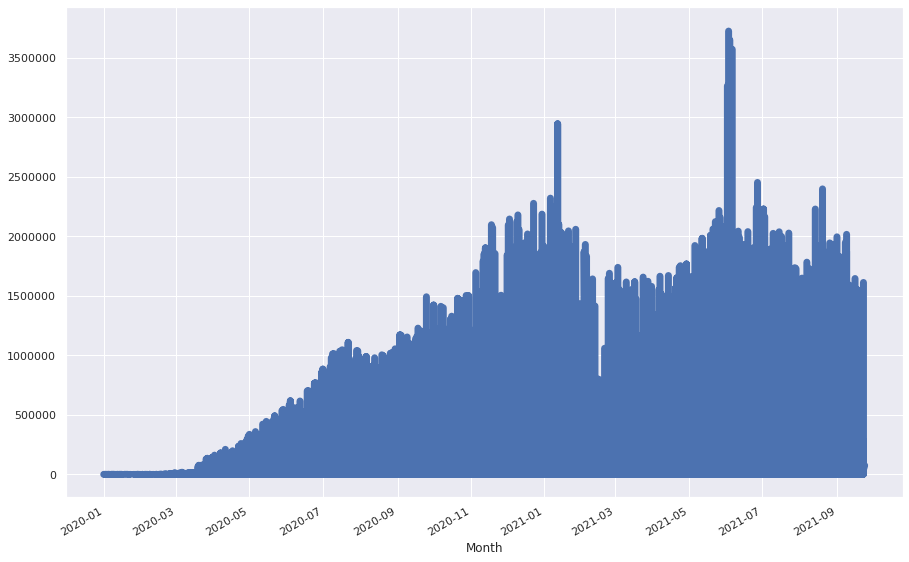

In [60]:
df1.new_tests.plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month')

Text(0.5, 0, 'Month')

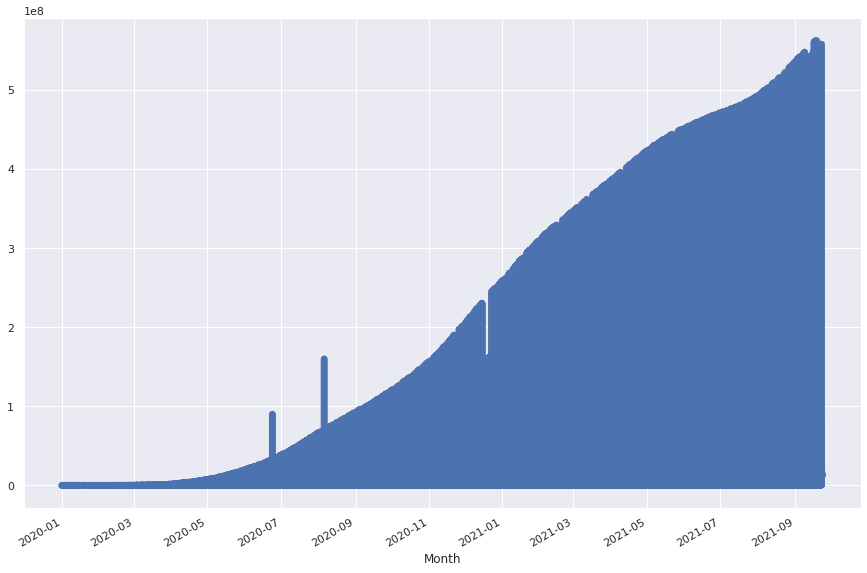

In [61]:
df1.total_tests.plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month')

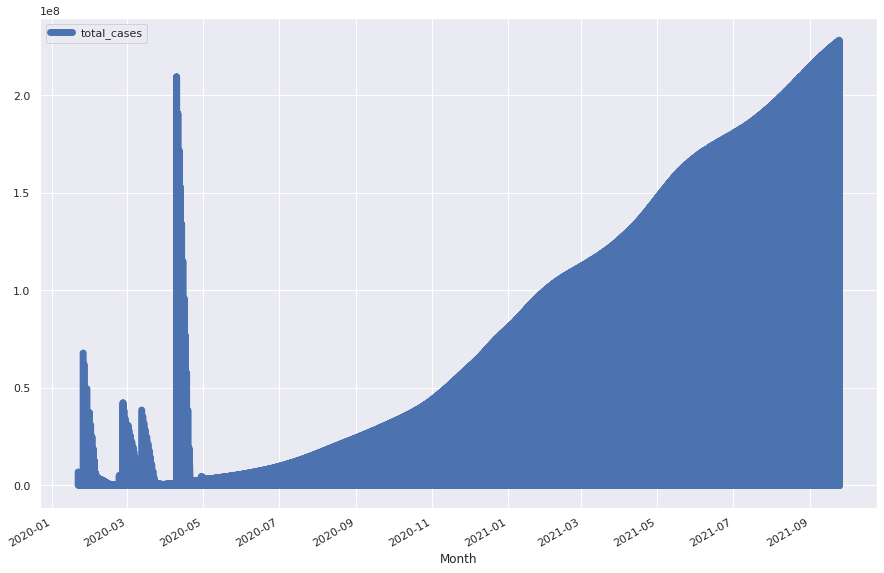

In [62]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (15, 10), linewidth = 7)
plt.xlabel('Month');

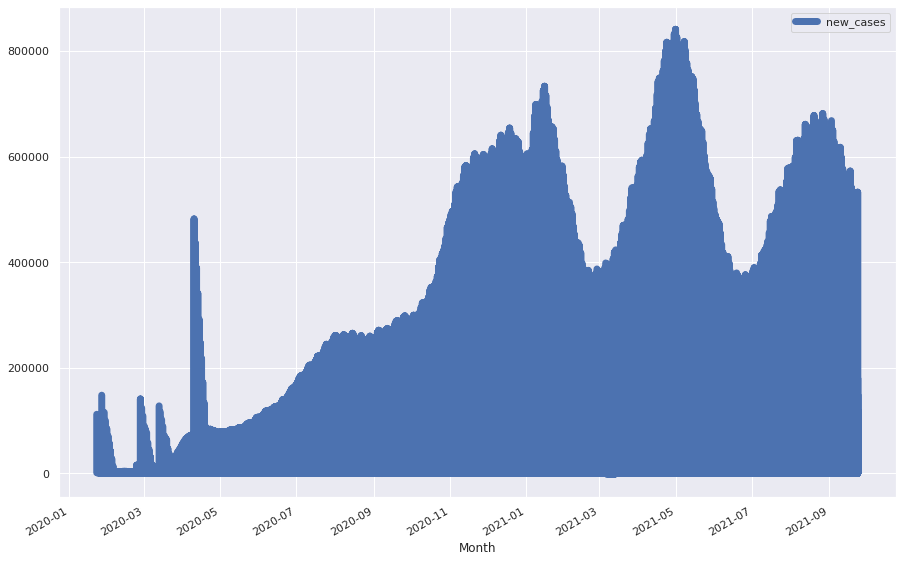

In [63]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month');

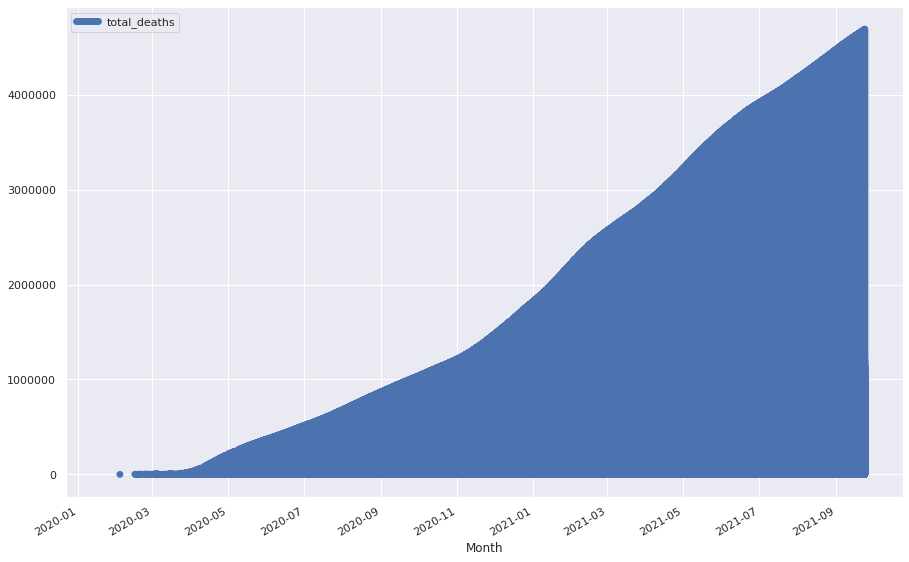

In [64]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month');

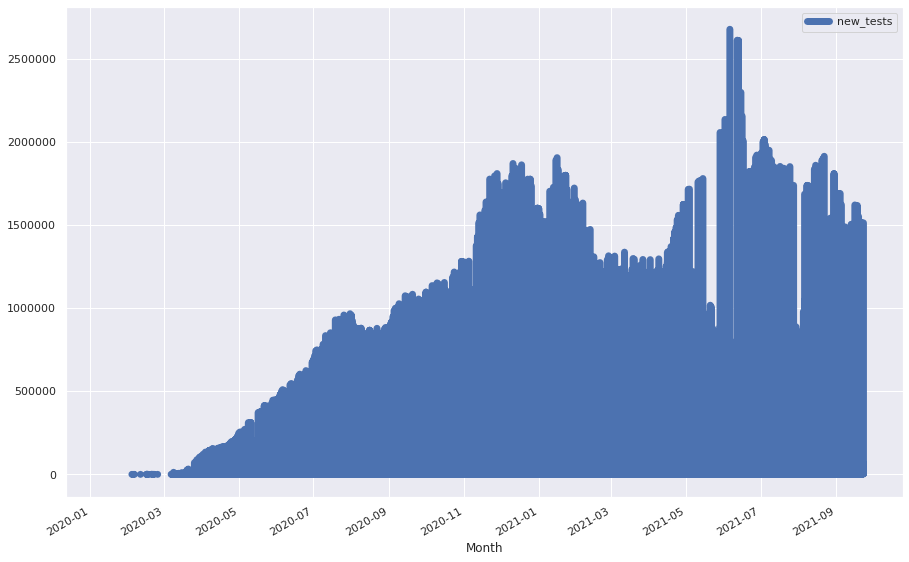

In [65]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month');

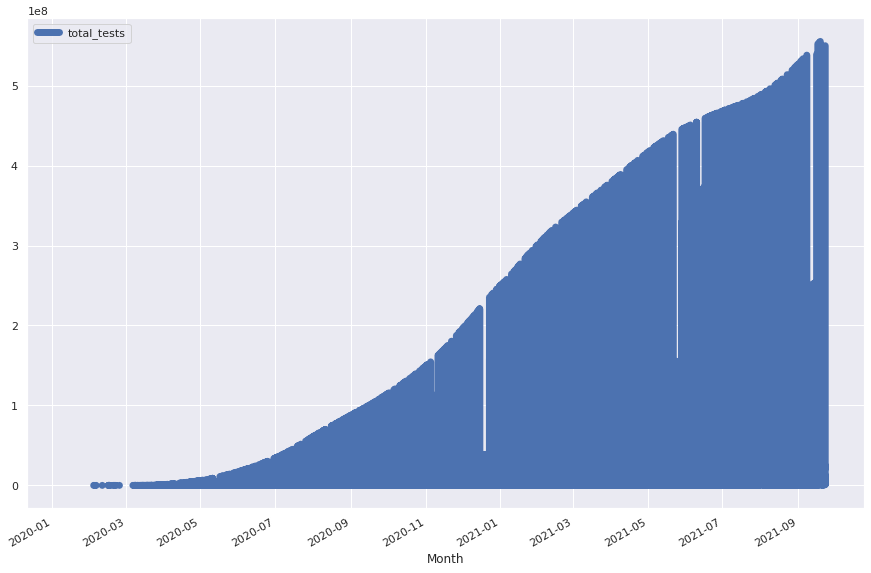

In [66]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month');

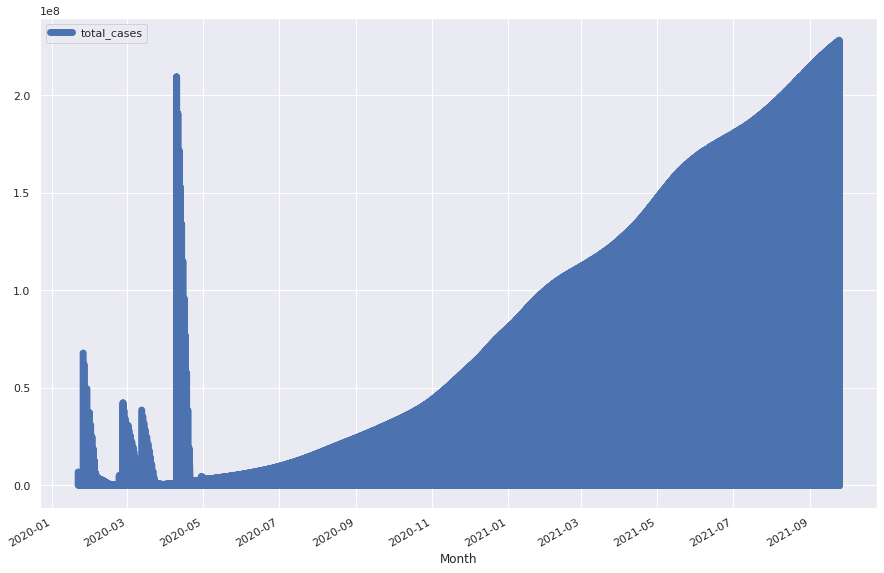

In [67]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month');

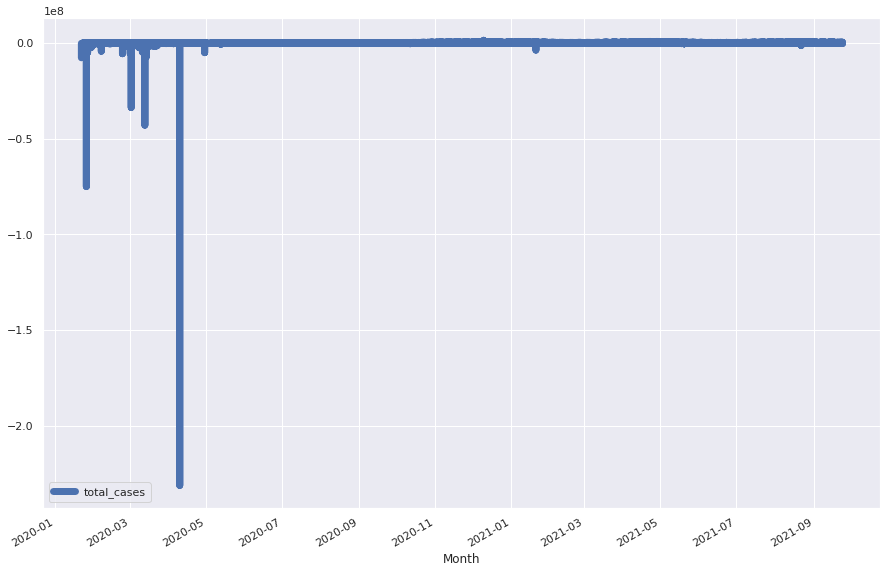

In [70]:
total_cases.diff().plot(figsize = (15 , 10), linewidth = 7)
plt.xlabel('Month');